In [1]:
from pymongo import MongoClient
import datetime
import pandas as pd
import numpy as np
import itertools
from collections import Counter

client = MongoClient("localhost", 27017)
db = client["reddit_polarization"]

In [2]:
# http://www.ranks.nl/stopwords
# MYSQL Stopwords
sw = ["a's", 'accordingly', 'again', 'allows', 'also', 'amongst',
      'anybody', 'anyways', 'appropriate', 'aside', 'available',
      'because', 'before', 'below', 'between', 'by', "can't",
      'certain', 'com', 'consider', 'corresponding', 'definitely',
      'different', "don't", 'each', 'else', 'et', 'everybody',
      'exactly', 'fifth', 'follows', 'four', 'gets', 'goes',
      'greetings', 'has', 'he', 'her', 'herein', 'him', 'how',
      "i'm", 'immediate', 'indicate', 'instead', 'it', 'itself',
      'know', 'later', 'lest', 'likely', 'ltd', 'me', 'more',
      'must', 'nd', 'needs', 'next', 'none', 'nothing', 'of',
      'okay', 'ones', 'others', 'ourselves', 'own', 'placed',
      'probably', 'rather', 'regarding', 'right', 'saying',
      'seeing', 'seen', 'serious', 'she', 'so', 'something',
      'soon', 'still', "t's", 'th', 'that', 'theirs', 'there',
      'therein', "they'd", 'third', 'though', 'thus', 'toward',
      'try', 'under', 'unto', 'used', 'value', 'vs', 'way',
      "we've", "weren't", 'whence', 'whereas', 'whether', "who's",
      'why', 'within', "wouldn't", "you'll", 'able', 'across',
      'against', 'almost', 'although', 'an', 'anyhow', 'anywhere',
      'are', 'ask', 'away', 'become', 'beforehand', 'beside',
      'beyond', "c'mon", 'cannot', 'certainly', 'come',
      'considering', 'could', 'described', 'do', 'done', 'edu',
      'elsewhere', 'etc', 'everyone', 'example', 'first', 'for',
      'from', 'getting', 'going', 'had', "hasn't", "he's", 'here',
      'hereupon', 'himself', 'howbeit', "i've", 'in', 'indicated',
      'into', "it'd", 'just', 'known', 'latter', 'let', 'little',
      'mainly', 'mean', 'moreover', 'my', 'near', 'neither', 'nine',
      'noone', 'novel', 'off', 'old', 'only', 'otherwise', 'out',
      'particular', 'please', 'provides', 'rd', 'regardless',
      'said', 'says', 'seem', 'self', 'seriously', 'should', 'some',
      'sometime', 'sorry', 'sub', 'take', 'than', "that's", 'them',
      "there's", 'theres', "they'll", 'this', 'three', 'to',
      'towards', 'trying', 'unfortunately', 'up', 'useful',
      'various', 'want', 'we', 'welcome', 'what', 'whenever',
      'whereby', 'which', 'whoever', 'will', 'without', 'yes',
      "you're", 'about', 'actually', "ain't", 'alone', 'always',
      'and', 'anyone', 'apart', "aren't", 'asking', 'awfully',
      'becomes', 'behind', 'besides', 'both', "c's", 'cant',
      'changes', 'comes', 'contain', "couldn't", 'despite', 'does',
      'down', 'eg', 'enough', 'even', 'everything', 'except', 'five',
      'former', 'further', 'given', 'gone', "hadn't", 'have', 'hello',
      "here's", 'hers', 'his', 'however', 'ie', 'inasmuch',
      'indicates', 'inward', "it'll", 'keep', 'knows', 'latterly',
      "let's", 'look', 'many', 'meanwhile', 'most', 'myself', 'nearly',
      'never', 'no', 'nor', 'now', 'often', 'on', 'onto', 'ought',
      'outside', 'particularly', 'plus', 'que', 're', 'regards', 'same',
      'second', 'seemed', 'selves', 'seven', "shouldn't", 'somebody',
      'sometimes', 'specified', 'such', 'taken', 'thank', 'thats',
      'themselves', 'thereafter', 'thereupon', "they're", 'thorough',
      'through', 'together', 'tried', 'twice', 'unless', 'upon', 'uses',
      'very', 'wants', "we'd", 'well', "what's", 'where', 'wherein',
      'while', 'whole', 'willing', "won't", 'yet', "you've", 'above',
      'after', 'all', 'along', 'am', 'another', 'anything', 'appear',
      'around', 'associated', 'be', 'becoming', 'being', 'best', 'brief',
      'came', 'cause', 'clearly', 'concerning', 'containing', 'course',
      'did', "doesn't", 'downwards', 'eight', 'entirely', 'ever',
      'everywhere', 'far', 'followed', 'formerly', 'furthermore', 'gives',
      'got', 'happens', "haven't", 'help', 'hereafter', 'herself', 'hither',
      "i'd", 'if', 'inc', 'inner', 'is', "it's", 'keeps', 'last', 'least',
      'like', 'looking', 'may', 'merely', 'mostly', 'name', 'necessary',
      'nevertheless', 'nobody', 'normally', 'nowhere', 'oh', 'once', 'or',
      'our', 'over', 'per', 'possible', 'quite', 'really', 'relatively',
      'saw', 'secondly', 'seeming', 'sensible', 'several', 'since',
      'somehow', 'somewhat', 'specify', 'sup', 'tell', 'thanks', 'the',
      'then', 'thereby', 'these', "they've", 'thoroughly', 'throughout',
      'too', 'tries', 'two', 'unlikely', 'us', 'using', 'via', 'was', "we'll",
      'went', 'whatever', "where's", 'whereupon', 'whither', 'whom', 'wish',
      'wonder', 'you', 'your', 'according', 'afterwards', 'allow', 'already',
      'among', 'any', 'anyway', 'appreciate', 'as', 'at', 'became', 'been',
      'believe', 'better', 'but', 'can', 'causes', 'co', 'consequently',
      'contains', 'currently', "didn't", 'doing', 'during', 'either',
      'especially', 'every', 'ex', 'few', 'following', 'forth', 'get', 'go',
      'gotten', 'hardly', 'having', 'hence', 'hereby', 'hi', 'hopefully',
      "i'll", 'ignored', 'indeed', 'insofar', "isn't", 'its', 'kept', 'lately',
      'less', 'liked', 'looks', 'maybe', 'might', 'much', 'namely', 'need',
      'new', 'non', 'not', 'obviously', 'ok', 'one', 'other', 'ours', 'overall',
      'perhaps', 'presumably', 'qv', 'reasonably', 'respectively', 'say', 'see',
      'seems', 'sent', 'shall', 'six', 'someone', 'somewhere', 'specifying',
      'sure', 'tends', 'thanx', 'their', 'thence', 'therefore', 'they', 'think',
      'those', 'thru', 'took', 'truly', 'un', 'until', 'use', 'usually', 'viz',
      "wasn't", "we're", 'were', 'when', 'whereafter', 'wherever', 'who',
      'whose', 'with', 'would', "you'd", 'yours', 'yourself', 'yourselves', 'zero',
      'guy', 'day', 'great', 'thing', 'fact', 'point', 'lot']
sw = set(sw)

In [3]:
men = pd.DataFrame(list(db["MensRights"].find({}, {"score": 1, "tokens_njv_pos": 1, "_id": 0})))
fem = pd.DataFrame(list(db["Feminism"].find({}, {"score": 1, "tokens_njv_pos": 1, "_id": 0})))
print men.shape, fem.shape

(2452716, 2) (213100, 2)


In [4]:
min_words = 20

In [5]:
def pos_filter(x, keep=set("NJ")):
    if len(x) == 0:
        return ""
    
    tokens_pos = x.split(" ")
    tokens_pos = map(lambda pair: pair.split("/"), tokens_pos)
    
    tokens_pos = filter(lambda pair: pair[1] in keep, tokens_pos)

    if len(tokens_pos) == 0:
        return ""
    
    return " ".join(zip(*tokens_pos)[0])

In [6]:
def clean_token_pos(text):
    text = pos_filter(text)
    out = " ".join(filter(lambda x: x not in sw, text.split(" ")))
    return out

In [7]:
men["corpus"] = men["tokens_njv_pos"].map(clean_token_pos)
fem["corpus"] = fem["tokens_njv_pos"].map(clean_token_pos)

In [8]:
men = men[men["corpus"].map(lambda x: len(x.split(" "))) >= min_words]
fem = fem[fem["corpus"].map(lambda x: len(x.split(" "))) >= min_words]

In [9]:
men.shape, fem.shape

((480773, 3), (55414, 3))

In [10]:
men["rank"] = men["score"].rank(ascending=False)
fem["rank"] = fem["score"].rank(ascending=False)

In [11]:
size = 5000

In [12]:
men_x_corpus = men[men["rank"] <= size]["corpus"]
fem_x_corpus = fem[fem["rank"] <= size]["corpus"]

In [13]:
men_x_corpus.shape, fem_x_corpus.shape

((5021,), (4993,))

In [14]:
men[men["rank"] <= size]["score"].min(), men[men["rank"] <= size]["score"].max()

(49, 2332)

In [15]:
fem[fem["rank"] <= size]["score"].min(), fem[fem["rank"] <= size]["score"].max()

(11, 490)

In [16]:
men_x_corpus = list(men_x_corpus.values)
fem_x_corpus = list(fem_x_corpus.values)

In [17]:
len(men_x_corpus), len(fem_x_corpus)

(5021, 4993)

In [18]:
train_sents = men_x_corpus + fem_x_corpus

In [19]:
y = np.r_[np.ones(len(men_x_corpus)), np.zeros(len(fem_x_corpus))]

In [20]:
men.shape, fem.shape

((480773, 4), (55414, 4))

In [21]:
men[:3]

,score,tokens_njv_pos,corpus,rank
1,1,gender/N abuser/N fact/N majority/N victim/N m...,gender abuser majority victim male men men wom...,340662.5
2,5,topic/N projecting/N hypocrisy/N context/N add...,topic projecting hypocrisy context turn projec...,112651.0
8,0,first/J paragraph/N issue/N assume/V feminism/...,paragraph issue feminism ideal premise incorre...,425338.5


In [22]:
fem[:3]

,score,tokens_njv_pos,corpus,rank
1,2,seem/V useless/J article/N reiterate/V simple/...,useless article simple notion men victim rape ...,26809.5
4,2,satire/N use/V wit/N point/V shortcoming/N mis...,satire wit shortcoming misdoings people group ...,26809.5
5,5,child/N mother/N care/N mother/N take/V drug/N...,child mother care mother drug pregnant mother ...,12503.5


In [23]:
background = pd.concat([men["corpus"],
                        fem["corpus"]], axis=0)

In [24]:
background = list(background.values)

In [25]:
background[:2]

[u'gender abuser majority victim male men men woman woman men men murderer bearing men victim murder statistic repeat justifiable correlation men non-existent support group woman support group',
 u'topic projecting hypocrisy context turn projecting opinion mitchellonfire time problem comment context hypocritical hypocritical word context comment vicious bile-filled anti-feminist rant context matter disgusting nature circumcision big downer plenty time critic rmensrights reddit conducive people feminism mensrights sin progress major fight people feminism holy religion misogynistic demon ideology legitimate counter']

In [26]:
men_x_corpus[:2]

[u'kind facebook kind post post original article hypothetical people empathy equal constructive female privelagemisognyoppression upvotes photo facebook interaction stupid fair equal rightsresponsibility real article isnt op post general movement kind post men',
 u'previous thread dentist wrocaw makowiak english source article polish news polish news piece tabloid english source information game choice steam']

In [27]:
fem_x_corpus[:2]

[u'time feminist issue subreddit rfeminism anime convention attendance female area high awareness feminist issue crowd year multitude inappropriate behaviour minor year aware assault couple time witness minor harassment',
 u'true minority indian girl america standard parent super rich safe wealthy area parent poverty india kid lucky standard privileged white friend parent male friend ends meet problem hateful check privilege strange blame oppression game important oppression stereotype important struggle inappropriate single group inferior time privilege racist ignorant douche racesgenders racist ignorant douche white men people white woman privileged group world war twat privilege american white woman battle minority racism white american woman perfect life negative institutionalized oppression white woman general war pretty woman russian invasion life white men white men type issue minority woman societal oppression specific abuse life general']

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

n_topics = [32, 64, 128, 256, 512, 1024]
lsi = Pipeline([("tfidf", TfidfVectorizer(analyzer='word', stop_words="english", max_features=4096)),
                    ("svd", TruncatedSVD(n_components=100)), 
                    ("normalizer", Normalizer())])

for n in n_topics:
    lsi.set_params(svd__n_components=n)
    X = lsi.fit_transform(train_sents)
    print X.shape
    lr = LogisticRegression(random_state=123)
    
#    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#    lr.fit(X_train, y_train)
    
#    print "Num of Topics = %d, accuracy = %f" % (n, lr.fit(X_train, y_train).score(X_test, y_test))
    print "Num of Topics = %d, accuracy = %f" % (n, np.mean(cross_val_score(lr, X, y, cv=10)))

(10014, 32)
Num of Topics = 32, accuracy = 0.670959
(10014, 64)
Num of Topics = 64, accuracy = 0.676348
(10014, 128)
Num of Topics = 128, accuracy = 0.689529
(10014, 256)
Num of Topics = 256, accuracy = 0.694818
(10014, 512)
Num of Topics = 512, accuracy = 0.706706
(10014, 1024)
Num of Topics = 1024, accuracy = 0.714794


In [29]:
len(background)

536187

In [30]:
def corpus2counter(corpus):
    c = Counter()
    for text in corpus:
        tokens = text.split(" ")
        tokens = filter(lambda x: len(x) > 0, tokens)
        c.update(tokens)
    return c    

In [31]:
def zscore(word, counter_i, n_i, 
           counter_j, n_j,
           counter_0, n_0, log=np.log):
    """
    Input: the counter of words in corpus_i and corpus_j, and their sizes(n_i and n_j)
           the counter of words in background corpus_0, and size (n_0)
           
    Function for computing the log-odds ratio. The LARGER the zscore, the MORE overrepresented
    the word `word` is in corpus_i as opposed in corpus_j
    """
    y_i = np.float(counter_i[word])
    y_j = np.float(counter_j[word])
    a_w = np.float(counter_0[word])

    ratio_i = (y_i + a_w) / (n_i + n_0 - y_i - a_w)
    ratio_j = (y_j + a_w) / (n_j + n_0 - y_j - a_w)

    if ratio_i < 0.:
        raise ValueError("ratio_i is negative: %f\n" % ratio_i)
    if ratio_j < 0.:
        raise ValueError("ratio_j is negative: %f\n" % ratio_j)

    logratio = log(ratio_i) - log(ratio_j)

    try:
        var_logratio = 1. / (y_i + a_w) + 1. / (y_j + a_w)
    except ZeroDivisionError as inst:
        print inst

    try:
        z = logratio / np.sqrt(var_logratio)
    except Exception as inst:
        print inst

    return z

In [32]:
men_counter = corpus2counter(men_x_corpus)
fem_counter = corpus2counter(fem_x_corpus)

In [33]:
background_counter = corpus2counter(background)

In [34]:
n_i = sum(men_counter.values())
n_j = sum(fem_counter.values())
n_0 = sum(background_counter.values())

In [35]:
n_i, n_j, n_0

(230515, 222120, 23819604)

In [36]:
common = set(men_counter.keys()) & set(fem_counter.keys())
common = list(common)

In [37]:
df = [(w, zscore(w, counter_i=men_counter, n_i=n_i,
                 counter_j=fem_counter, n_j=n_j,
                 counter_0=background_counter, n_0=n_0)) for w in common]

In [38]:
df = pd.DataFrame(np.array(zip(*df)).T, columns=["word", "zscore"])
df["zscore"] = df["zscore"].astype(np.float)
df = df.sort_values(by="zscore")

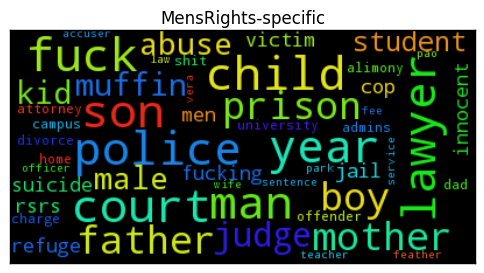

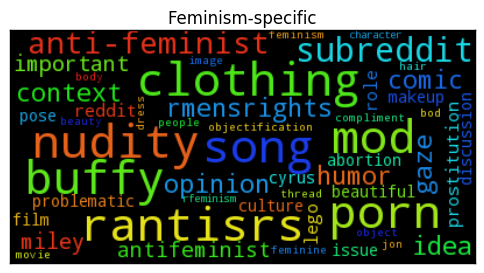

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

men = dict(df.iloc[-50:, :].values)
fem = dict(df.iloc[:50, :].values)

wc_men = WordCloud(max_font_size=40).generate_from_frequencies((k, men[k]) for k in men.keys())
wc_fem = WordCloud(max_font_size=40).generate_from_frequencies((k, fem[k]) for k in fem.keys())

plt.imshow(wc_men)
plt.title("MensRights-specific")
plt.xticks([])
plt.yticks([])
plt.show()
plt.imshow(wc_fem)
plt.title("Feminism-specific")
plt.xticks([])
plt.yticks([])
plt.show()

LDA on men_x_corpus and fem_x_corpus